In [198]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import tensorflow as tf
import matplotlib.pyplot as plt  # plot 
from sklearn.model_selection import train_test_split # 划分数据集
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.externals import joblib  # 导出sklearn模型
from sklearn import metrics # 评估模型
from sklearn.metrics import confusion_matrix # 混淆矩阵

In [199]:
#　查看是否在使用gpu进行训练
tf.test.is_gpu_available()

False

In [200]:
# 准备数据
df = pd.read_csv('output_normalized_cmu.csv', header=0)
seed = 42

In [201]:
# x为36维特征
x = df.loc[:, :'17_y'].astype(float)
# y为动作种类（标签）
y = df.loc[:,['type_index'] ]
labels_name = ['Stand', 'Wave', 'Flap', 'Squat', 'Bowling']

In [202]:
# 划分数据集
x_temp,x_test,y_temp,y_test = train_test_split(x, y, test_size=0.2, random_state=seed) # 第一次划分，划分出20%为测试集：x_test, y_test
x_train, x_validation, y_train, y_validation = train_test_split(x_temp, y_temp, test_size=0.25, random_state=seed) # 第二次划分，划分出60%的训练集和20%的验证集
print('训练集大小:', len(x_train),  '验证集大小:', len(x_validation),  '测试集大小:', len(x_test))

训练集大小: 1317 验证集大小: 439 测试集大小: 439


In [203]:
# 训练贝叶斯分类器（3种）
g_nb = GaussianNB() # GaussianNB
m_nb = MultinomialNB() # MultinomialNB
b_nb = BernoulliNB() # BernoulliNB

In [204]:
# 在训练集上训练
g_nb.fit(x_train,y_train)
m_nb.fit(x_train,y_train)
b_nb.fit(x_train,y_train)

/home/mastlab-zl/anaconda3/envs/tf-cpu/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mastlab-zl/anaconda3/envs/tf-cpu/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mastlab-zl/anaconda3/envs/tf-cpu/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [205]:
# 在验证集上检验模型
print("GaussianNB Model Evaluation on validation data: accuracy = %0.3f%% \n"  % ( g_nb.score(x_validation, y_validation) * 100) )
print("MultinomialNB Model Evaluation on validation data: accuracy = %0.3f%% \n"  % ( m_nb.score(x_validation, y_validation) * 100) )
print("BernoulliNB Model Evaluation on validation data: accuracy = %0.3f%% \n"  % ( b_nb.score(x_validation, y_validation) * 100) )


GaussianNB Model Evaluation on validation data: accuracy = 97.722% 

MultinomialNB Model Evaluation on validation data: accuracy = 78.588% 

BernoulliNB Model Evaluation on validation data: accuracy = 63.554% 



In [206]:
# 在测试集上检验模型
print("GaussianNB Model Evaluation on test data: accuracy = %0.3f%% \n"  % ( g_nb.score(x_test, y_test) * 100) )
print("MultinomialNB Model Evaluation on test data: accuracy = %0.3f%% \n"  % ( m_nb.score(x_test, y_test) * 100) )
print("BernoulliNB Model Evaluation on test data: accuracy = %0.3f%% \n"  % ( b_nb.score(x_test, y_test) * 100) )

GaussianNB Model Evaluation on test data: accuracy = 98.405% 

MultinomialNB Model Evaluation on test data: accuracy = 82.916% 

BernoulliNB Model Evaluation on test data: accuracy = 61.731% 



In [207]:
# 评估模型
y_pred = g_nb.predict(x_test)
y_true = y_test
print(metrics.classification_report(y_test, y_pred,digits=4 ))

              precision    recall  f1-score   support

           0     1.0000    0.9908    0.9954       109
           1     0.9457    0.9775    0.9613        89
           2     1.0000    0.9785    0.9891        93
           3     0.9886    0.9886    0.9886        88
           4     0.9833    0.9833    0.9833        60

    accuracy                         0.9841       439
   macro avg     0.9835    0.9838    0.9836       439
weighted avg     0.9844    0.9841    0.9842       439



In [208]:
# 绘制混淆矩阵
def plot_Matrix(cm, classes, title=None,  cmap=plt.cm.Blues):
    plt.rc('font',family='Times New Roman',size='8')   # 设置字体样式、大小
    
    # 按行进行归一化
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    str_cm = cm.astype(np.str).tolist()
    for row in str_cm:
        print('\t'.join(row))
    # 占比1%以下的单元格，设为0，防止在最后的颜色中体现出来
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if int(cm[i, j]*100 + 0.5) == 0:
                cm[i, j]=0

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    # ax.figure.colorbar(im, ax=ax) # 侧边的颜色条带
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual',
           xlabel='Predicted')

    # 通过绘制格网，模拟每个单元格的边框
    ax.set_xticks(np.arange(cm.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(cm.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # 将x轴上的lables旋转45度
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # 标注百分比信息
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if int(cm[i, j]*100 + 0.5) > 0:
                ax.text(j, i, format(int(cm[i, j]*100 + 0.5) , fmt) + '%',
                        ha="center", va="center",
                        color="white"  if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig('cm.png', dpi=300)
    plt.show()
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[108   1   0   0   0]
 [  0  87   0   1   1]
 [  0   2  91   0   0]
 [  0   1   0  87   0]
 [  0   1   0   0  59]]


Normalized confusion matrix
0.9908256880733946	0.009174311926605505	0.0	0.0	0.0
0.0	0.9775280898876404	0.0	0.011235955056179775	0.011235955056179775
0.0	0.021505376344086023	0.978494623655914	0.0	0.0
0.0	0.011363636363636364	0.0	0.9886363636363636	0.0
0.0	0.016666666666666666	0.0	0.0	0.9833333333333333


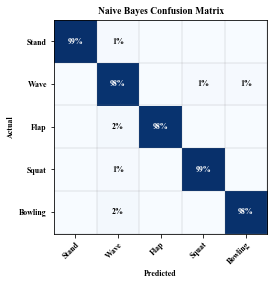

In [209]:
plot_Matrix(cm, labels_name, "Naive Bayes Confusion Matrix")

In [210]:
# 导出sklearn模型
joblib.dump(g_nb, "naivebayes_model.m")
# joblib.dump(m_nb, "multinomialNB_model.m")
# joblib.dump(b_nb, "bernoulliNB_model.m")

['naivebayes_model.m']

In [211]:
input =  [0.42, 0.0, 0.33, 0.14, 0.17, 0.14, 0.08, 0.31, 0.0, 0.48, 0.5, 0.14, 0.75, 0.1, 1.0, 0.03, 0.25, 0.48, 0.25, 0.76, 0.17, 1.0, 0.42, 0.48, 0.42, 0.76, 0.42, 1.0, 0.33, 0.0, 0.42, 0.0, 0.25, 0.0, 0.42, 0.03]
input  = np.array(input).reshape((1, 36))
pred_output  =  g_nb.predict(input)
print(pred_output)

[1]
